# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
 print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [ ]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:


1. **¿De qué se trata el conjunto de datos?** El conjunto de datos contiene información sobre el valor de las propiedades en Boston y caracteristicas del entorno en donde esta ubicada la propiedad. 
2. **¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?** La variable objetivo a predecir es `MEDV`, el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares. 
3. **¿Qué información (atributos) hay disponibles para hacer la predicción?** Los atributos disponibles para hacer la predicción son 13: 
    * `CRIM`: tasa de criminalidad per capita en la ciudad. 
    * `ZN`: proporción de terreno residencial dividida en lotes mayores de 25.000 sq.ft (2.223 mt2). 
    * `INDUS`: proporción de negocios no minoristas. 
    * `CHAS`: variable dummy (ficticia) que es igual a 1 si el terreno esta en la ribera del rio e igual a 0 en caso contrario. 
    * `NOX`: concentración de óxido de nitrógeno (partes por 10 millones). 
    * `RM`: número promedio de habitaciones por vivienda. 
    * `AGE`: proporción de viviendas construidas antes de 1940. 
    * `DIS`: distancias ponderdas a cinco centros de empleo de Boston. 
    * `RAD`: índice de accesibilidad a autopistas radiales. 
    * `TAX`: tasa impositiva por cada 10.000$ del valor de la propiedad. 
    * `PTRATIO`: ratio de alumnos por profesor. 
    * `B`: calculada como 1000(Bk — 0.63)², donde Bk es la proporción de afroamericanos. 
    * `LSTAT`: porcentaje de población de "bajo recursos". 
4.  **¿Qué atributos imagina ud. que serán los más determinantes para la predicción?** Los atributos que imaginamos determinantes son: porcentaje de propietarios de clase('LSTAT'), promedio de habitaciones por vivienda ('RM') y tasa de criminalidad per cápita por barrio('CRIM'). 
5. **¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.** Uno de los riesgos que identificamos es la utilización de la variable B como característica potencialmente determinante de nuestra variable objetivo. Es decir, el sesgo puede generarse a partir de que las asociaciones que pueden existir entre la variable B y el indice de criminalidad y/o el precio se utilicen como insumo para la predicciones futuras cuando en realidad son métricas descriptivas del momento en que se genero el conjunto de datos. El riesgo se encuentra en reproducir estas relaciones ,propias de un momento determinado, para un momento futuro en el que probablemente no sean válidas.



## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

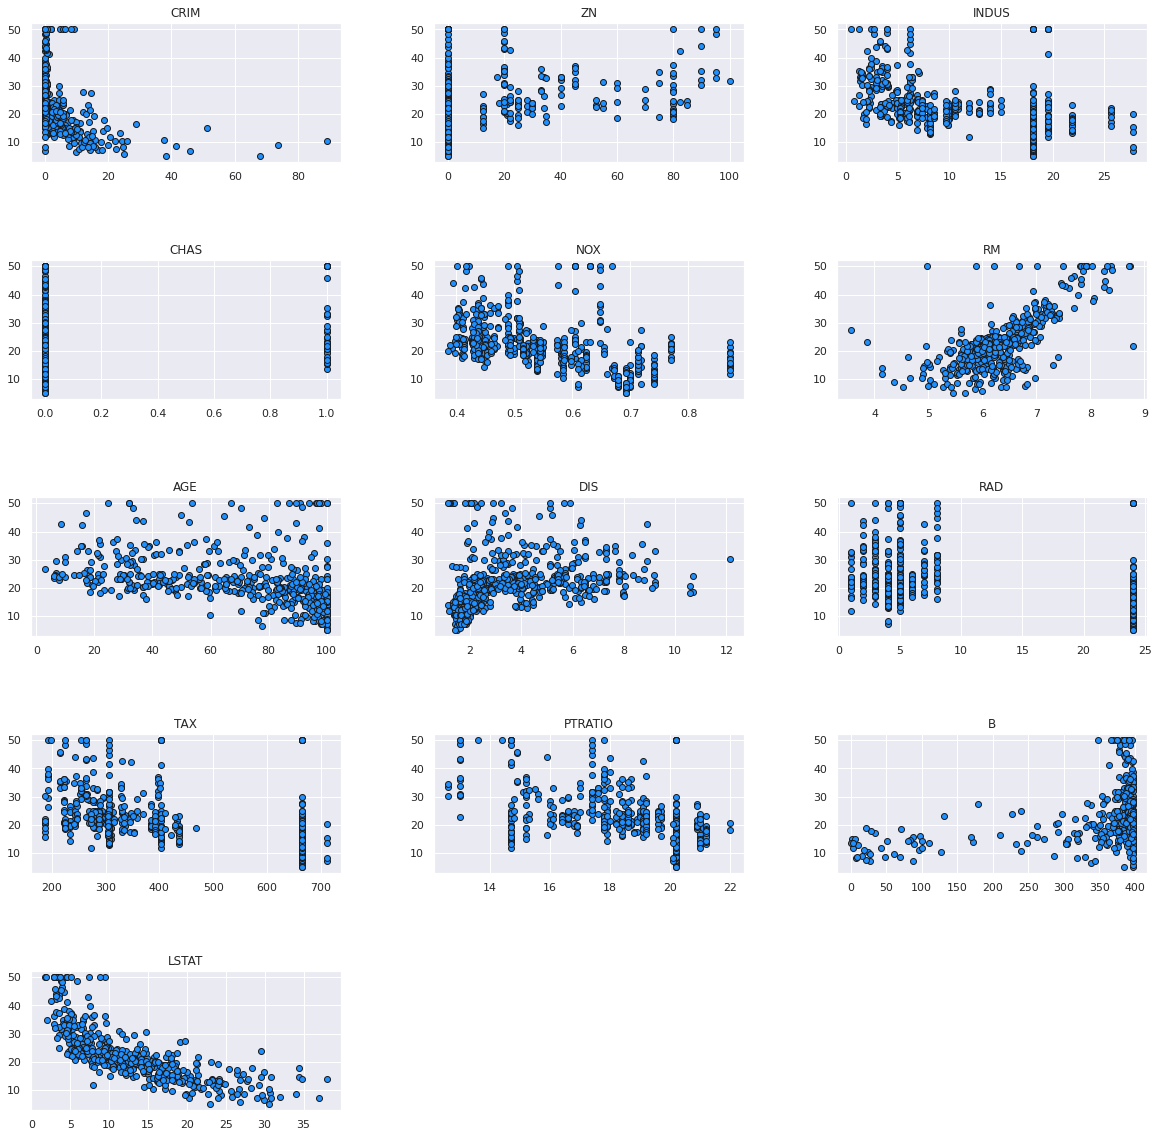

In [ ]:
# Graficos de los atributos: 

row = 5
col = 3
i = 1 # inicia el conteo

fig = plt.figure(figsize=(20,20))

for feature in boston['feature_names']:
  selector = (boston['feature_names'] == feature)
  plt.subplot(row, col, i)
  plt.title(feature)
  plt.scatter(x = X[:, selector], y = y, facecolor="dodgerblue", edgecolor="k", label="datos")
  i += 1


plt.subplots_adjust(wspace = 0.3, hspace = 0.7) 
plt.show()

2. Los atributos que aportarían más información a la predicción del precio de una propiedad serían aquellos que exhiban una relación clara con el precio (tanto positiva como negativa). Si observamos las gráficas vemos que `CRIM`, `RM` y `LSTAT` presentan una relación bastante clara. En el caso de `CRIM`, la relación seria negativa, mayor es el precio de una propiedad si la tasa de criminalidad en la zona es baja y, por ende, el barrio es más seguro. En el caso de `RM`, la relación es positiva, mientras más habitaciones (en promedio) exhiba una propiedad, mayor será su precio. Por último, para la variable `LSTAT` la relación es negativa, lo que indicaria que, mientras más bajo sea el "status" de la población, lo que se podria interpretar como un poder adquisitivo bajo, en la zona, las propiedades tendrán un menor valor. 

3. Listando en orden de importancia los atributos para la predicción del valor de la propiedad (el orden se establece de mayor a menor, observando los gráficos del punto 1 e identificando los atributos cuya relación con el precio sea más clara). 

    1. LSTAT (relación negativa)
    2. RM (relación positiva). 
    3. CRIM (relación negativa).
    4. NOX (posiblemente negativa). 
    5. INDUS (posiblemente negativa). 
    6. ZN (posiblemente positiva). 
    7. PTRATIO (sin relación clara). 
    8. DIS (sin relación clara). 
    9. AGE (sin relación clara). 
    10. TAX (sin relación clara). 
    11. B (sin relación clara).
    12. CHAS (sin relación clara).

Dado que el listado anterior fue "a ojo", realizamos una matriz de correlación para comprobar si el análisis gráfico se condice con lo que realmente sucede. 

Tomamos el atajo de transformar el conjunto de datos a formato dataframe


In [ ]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Nuestra variable objetivo 'MEVD' no se encuentra en el df por lo que la agregamos.

In [ ]:
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


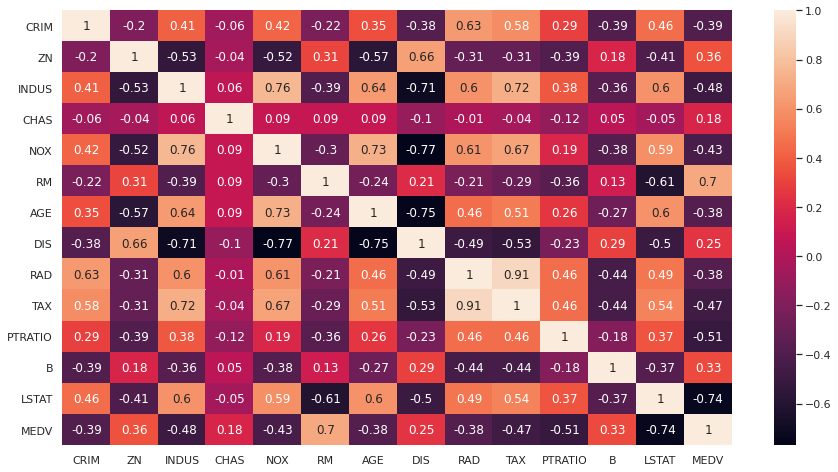

In [ ]:
# Configuro tamaño
sns.set(rc = {'figure.figsize':(15,8)})
# Defino matriz
correlation_matrix = boston_df.corr().round(2)
# Grafico matriz generada
sns.heatmap(data=correlation_matrix, annot=True) # annot = True me permite imprimir valores.


Observamos que los valores de la matriz muestran una correlación positiva de 0.7 entre las variables 'MEDV' y 'RM', y negativa de -0.74 para las varaibles'MEDV' y 'LSTAT'.
A su vez, otro valor significativo pero de menor magnitud se da nuestra variable objetivo y 'PTRATIO', siendo igual a -0.51.

Si realizamos un listado de las variables en orden de importancia los atributos para la predicción del precio:LSTAT, RM, PTRATIO, INDUS, TAX, NOX, CRIM, AGRE, RAD, ZN, B, DIS y CHAS. En general, lo que vimos graficamente, se mantiene. 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression # Importamos el modelo

modelo = LinearRegression()
modelo.fit(X = X_train_f.reshape(-1, 1), y = y_train)

  # Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X[:, selector], y))

Intercepto: 34.76519272372788
Coeficiente RM: [-0.95648761]
R^2: 0.5439214616845225


In [ ]:
from sklearn.metrics import mean_squared_error

# 3. Predecir y evaluar acá.
y_train_pred = modelo.predict(X = X_train_f)
y_test_pred = modelo.predict(X = X_test_f)

  # Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
  # Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 36.523966
Test error: 46.336305


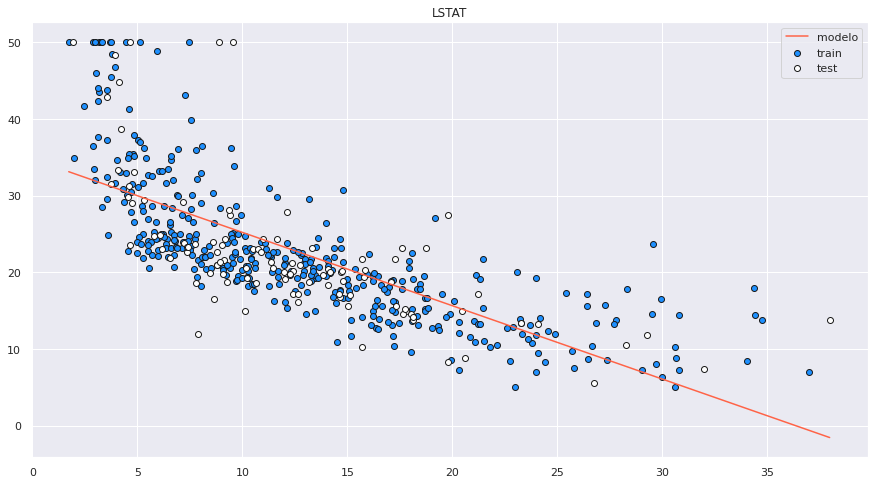

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, modelo.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

5. El modelo de regresión lineal con un único atributo, LSTAT (porcentaje de personas de bajo recursos), para explicar el precio de la propiedad tiene un buen ajuste si consideramos que sólo utilizamos uno de los 13 atributos disponibles, la variable LSTAT explica un 54% de la variación del precio de la propiedad (R^2 = 0.54). 

  El modelo se reresentaria de la siguiente manera: 
$$Y = 34.8 - 0.96 LSTAT$$

  Lo que indicaria que si, el porcentaje de personas de bajos recursos aumenta en una unidad, el precio disminuye en 0.96 miles de dólares. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_error = []
test_error = []
grados = [2, 3, 4, 5, 6, 7, 8, 9]

for grado in grados: 
  pf = PolynomialFeatures(grado)  
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(X_train_f, y_train)

  pf_y_train_predict = model.predict(X_train_f)
  pf_y_test_predict = model.predict(X_test_f)

  pf_train_error = mean_squared_error(y_train, pf_y_train_predict)
  train_error.append(pf_train_error)
  pf_test_error = mean_squared_error(y_test, pf_y_test_predict)
  test_error.append(pf_test_error)

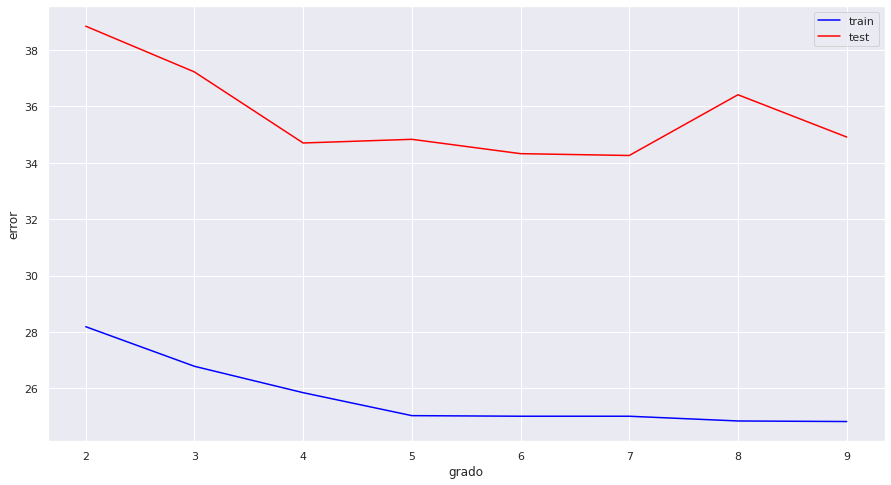

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(grados, train_error, color="blue", label="train")
plt.plot(grados, test_error, color="red", label="test")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.show()

3. El error en entrenamiento disminuye hasta el grado 5, despues del cual permanece relativamente estable. En cuanto al error en el conjunto test, disminuye hasta el grado de polinomio 7 y luego aumenta en el polinomio 8, pudiendose dar un sobreajuste a partir del polinomio 8. 

  Se seleccionará el grado 5 

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 5

pf_select = PolynomialFeatures(degree)  
lr_select = LinearRegression(fit_intercept=False)
model_select = make_pipeline(pf_select, lr_select) 
model_select.fit(X_train_f, y_train)

pf_y_train_predict_select = model_select.predict(X_train_f)
pf_y_test_predict_select = model_select.predict(X_test_f)

pf_train_error_select = mean_squared_error(y_train, pf_y_train_predict_select)
pf_test_error_select = mean_squared_error(y_test, pf_y_test_predict_select)

In [ ]:
print("Train error: ", pf_train_error_select)
print("Test error: ", pf_test_error_select)

Train error:  25.03496253774958
Test error:  34.83470818133642


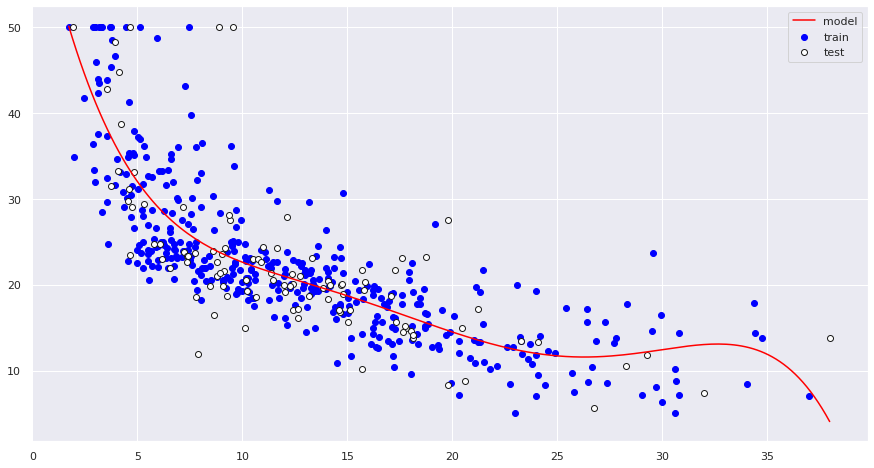

In [ ]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model_select.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

5. El modelo parece ajustar bien el comportamiento general de los datos (principalmente aquellos que se encuentran concentrados) pero parece sobreajustar en los extremos. Siguiendo el principio de parsimonia y eligiendo el grado de polinomio a partir del cual el error en train se estabiliza (5), se obtuvo un error en train de 25.03 y en test de 34.83, menor que los obtenidos en la regresion lineal (36 y 46, respectivamente). 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'CRIM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
# 2. Resolver acá.
degree = 5

pf_select = PolynomialFeatures(degree)  
lr_select = LinearRegression(fit_intercept=False)
model_select = make_pipeline(pf_select, lr_select)
model_select.fit(X_train_fs, y_train)

pf_y_train_predict_select = model_select.predict(X_train_fs)
pf_y_test_predict_select = model_select.predict(X_test_fs)

pf_train_error_select = mean_squared_error(y_train, pf_y_train_predict_select)
pf_test_error_select = mean_squared_error(y_test, pf_y_test_predict_select)

In [ ]:
print("Train error: ", pf_train_error_select)
print("Test error: ", pf_test_error_select)

Train error:  7.81161792128373
Test error:  402.4733835093548


3. El modelo con 3 atributos (LSTAT, RM y CRIM) no es mejor que el modelo basado en un unico atributo ya que, a pesar de que el error en train es menor, el error en test aumenta. Esto parece indicar que el modelo no esta ajustando bien a datos no antes vistos.

## Más ejercicios (opcionales)





### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [ ]:
#Defino en formato df los features y variable objetivo
X=boston_df[boston.feature_names]
y=boston_df[["MEDV"]]
#Covierto en array X e y
X_np=X.to_numpy()
y_np=y.to_numpy()
#Concateno X,y
X, y = X_np, y_np
#Divido en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
#Que forma tienen mis conjuntos
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
#Defino modelo
modelo = LinearRegression()
#Aplico modelo
modelo.fit(X = X_train, y = y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))

Intercepto: [38.09169493]
Coeficiente RM: [[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
  -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
   2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
  -4.92792725e-01]]
R^2: 0.7373440319905036


En este caso podemos observar que el R^2 del modelo multiple es mayor al del lineal simple. Este resultado puede deberse a la inclusión de todas las variables explicativas del dataset y no porque necesariamente el modelo con todas las features ajuste mejor. Para aislar el efecto del modelo quizás sea mejor calcular el R^2 ajustado.


In [ ]:
#R^2 Ajustado
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

R^2 ajustado: 0.46774796726530904


In [ ]:
# 3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.326470
Test error: 33.448980


En comparación con nuestro modelo de regresión simple que tomaba un solo feature que correspondía a 'LSTAT' el modelo de regresión mútiple que considera todos los features presenta menores errores de test y entrenamiento.
Respecto al modelo de regresión polinomial el modelo de regresión múltiple presenta menor error de test.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?



In [ ]:
#Defino en formato df los features y variable objetivo
X=boston_df[boston.feature_names]
y=boston_df[["MEDV"]]
#Covierto en array X e y
X_np=X.to_numpy()
y_np=y.to_numpy()
#Concateno X,y
X, y = X_np, y_np
#Divido en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
#Que forma tienen mis conjuntos
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
#Defino modelo (alpha=0.5)
f_reg=.5
modelo = linear_model.Ridge(alpha=f_reg)
modelo.fit(X=X_train,y=y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Intercepto: [34.67686786]
Coeficiente RM: [[-1.17712600e-01  4.55479109e-02 -1.36406951e-02  2.31256453e+00
  -1.11790386e+01  3.74445793e+00 -7.93289596e-03 -1.31676435e+00
   2.29469201e-01 -1.13290079e-02 -9.95511399e-01  8.38862222e-03
  -4.96354149e-01]]
R^2: 0.735612627450914
R^2 ajustado: 0.4642394096921978


In [ ]:
#3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.394973
Test error: 33.902745


En este caso con un alpha igual a 0.5 los errores de test y entrenamiento no mejoran respecto al modelo de regresión lineal multiple.
Probamos con un alfa mayor igual a 1.5

In [ ]:
#Defino modelo (alpha=1.5)
f_reg=1.5
modelo = linear_model.Ridge(alpha=f_reg)
modelo.fit(X=X_train,y=y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Intercepto: [31.91322768]
Coeficiente RM: [[-0.11625521  0.04632427 -0.03002203  2.24197854 -6.93382276  3.75512886
  -0.01189625 -1.2575607   0.21771971 -0.0116603  -0.95343174  0.00862405
  -0.50087861]]
R^2: 0.7326628160403807
R^2 ajustado: 0.45826184469971465


In [ ]:
#3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.564163
Test error: 34.467963


En este caso tampoco mejoran los resultados de errores en test y entrenamiento e incluso aumentan respecto a una alfa de 0.5
Probamos con un alfa mayor igual a 3



In [ ]:
#Defino modelo (alpha=3)
f_reg=3
modelo = linear_model.Ridge(alpha=f_reg)
modelo.fit(X=X_train,y=y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Intercepto: [30.53681676]
Coeficiente RM: [[-0.11542159  0.04696332 -0.03968469  2.13438588 -4.42181344  3.73032624
  -0.01398207 -1.22332607  0.2120695  -0.01191507 -0.93030406  0.00875606
  -0.5058199 ]]
R^2: 0.7302203440948254
R^2 ajustado: 0.45331236394825386


In [ ]:
#3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.715644
Test error: 34.890856


En este caso tampoco mejoran los resultados de errores en test y entrenamiento e incluso aumentan respecto a una alfa de 0.5 y 1.5
Probamos con un alfa igual a 5.

In [ ]:
#Defino modelo (alpha=5)
f_reg=5
modelo = linear_model.Ridge(alpha=f_reg)
modelo.fit(X=X_train,y=y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

Intercepto: [30.05920829]
Coeficiente RM: [[-0.11495509  0.04754304 -0.04522101  2.00250719 -2.98473362  3.67842325
  -0.01486271 -1.20453123  0.21031711 -0.01212694 -0.91907474  0.00882035
  -0.51136732]]
R^2: 0.7284926154182412
R^2 ajustado: 0.4498112552276147


In [ ]:
#3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.825679
Test error: 35.178583


En este caso tampoco mejoran los resultados de errores en test y entrenamiento e incluso aumentan respecto a una alfa de 0.5 , 1.5 y 3.


**Una opción es aplicar la regresión RidgeCV que es una regresión ridge con el hiperparametro obtenido mediante un metodo de Cross Validation**

In [ ]:
#Defino el modelo(por default el array de alphas sobre el que se aplica CV es 0.1, 1.0, 10.0)
list_alf=(0.0001,0.001,0.01,0.1,0.5,1,1.5,3,6,12)
modelo = linear_model.RidgeCV(alphas=list_alf)
modelo.fit(X=X_train,y=y_train)

# Información del modelo: 
print("Intercepto:", modelo.intercept_)
print("Coeficiente RM:", modelo.coef_)
print("R^2:", modelo.score(X, y))
print("R^2 ajustado:",modelo.score(X, y)-(1-modelo.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("Alpha obtenido", modelo.alpha_)


Intercepto: [37.99269997]
Coeficiente RM: [[-1.19393666e-01  4.48010216e-02  4.93767438e-03  2.34036616e+00
  -1.59821384e+01  3.70988458e+00 -3.26003171e-03 -1.38440044e+00
   2.43750611e-01 -1.09990215e-02 -1.04446954e+00  8.11810125e-03
  -4.92883384e-01]]
R^2: 0.7373195879576827
R^2 ajustado: 0.46769843332075134
Alpha obtenido 0.01


In [ ]:
#3. Predección y evaluación.
y_train_pred = modelo.predict(X = X_train)
y_test_pred = modelo.predict(X = X_test)

# Calculo RMSE para TRAIN
train_error = mean_squared_error(y_train, y_train_pred)
# Calculo RMSE para TEST
test_error = mean_squared_error(y_test, y_test_pred)
      
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 19.326526
Test error: 33.458995
